In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Loading Data

df = pd.read_csv('/content/drive/MyDrive/Dataset/diabetes.csv')

In [4]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)

# Preprocessing

In [8]:
# create an instance of the StandardScaler class
sc = StandardScaler()
# transform the test data
X_sc = sc.fit_transform(X)
# create dataframes using the scaled data and original column names
X_sc = pd.DataFrame(X_sc, columns = X.columns)

In [9]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.4, random_state = 0)

In [10]:
print(X_train.shape)

(460, 8)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
knn_pred = model.predict(X_test)

Prediction accuracy for Random Forest Classifier;
74.03%

_______________________________________________
_____________________________________________________
Classification report RFC-classifier
_____________________________________________________
              precision    recall  f1-score   support

           0       0.78      0.86      0.81       205
           1       0.64      0.50      0.57       103

    accuracy                           0.74       308
   macro avg       0.71      0.68      0.69       308
weighted avg       0.73      0.74      0.73       308



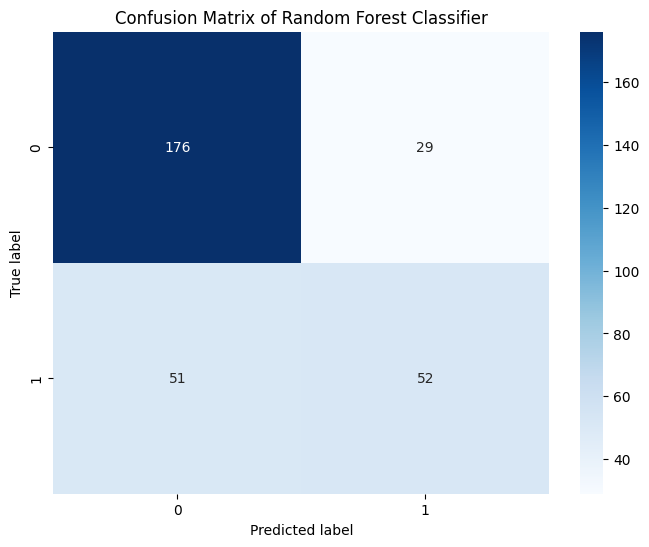

In [33]:
print('Prediction accuracy for Random Forest Classifier;')
print('{:.2%}\n'.format(accuracy_score(y_test, knn_pred)))
print("_______________________________________________")

print("_____________________________________________________")
print('Classification report RFC-classifier')
print("_____________________________________________________")
print(classification_report(y_test,knn_pred))


# Confusion Matrix
cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, max_depth=100,min_samples_split=2, random_state=0)
RFC.fit(X_train,y_train)
#RFC_pred = RFC.predict(X_test)

RandomForestClassifier(max_depth=100, random_state=0)

In [24]:
RFC_pred = RFC.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Prediction accuracy for Random Forest Classifier;
75.65%

_______________________________________________
_____________________________________________________
Classification report RFC-classifier
_____________________________________________________
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       205
           1       0.69      0.49      0.57       103

    accuracy                           0.76       308
   macro avg       0.73      0.69      0.70       308
weighted avg       0.75      0.76      0.74       308



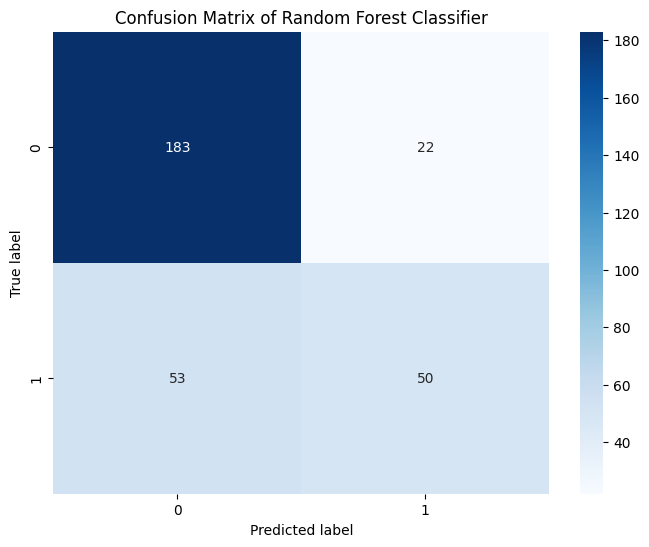

In [29]:
print('Prediction accuracy for Random Forest Classifier;')
print('{:.2%}\n'.format(accuracy_score(y_test, RFC_pred)))
print("_______________________________________________")

print("_____________________________________________________")
print('Classification report RFC-classifier')
print("_____________________________________________________")
print(classification_report(y_test,RFC_pred))


# Confusion Matrix
cm = confusion_matrix(y_test, RFC_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

In [12]:
# Save Model
import pickle
pickle.dump(model,open('knn.sav','wb'))

In [13]:
#Read model saved
knn_saved = pickle.load(open('knn.sav', 'rb'))

In [15]:
# Save Model
import pickle
pickle.dump(RFC,open('RFC.sav','wb'))

In [16]:
#Read model saved
RFC_saved = pickle.load(open('RFC.sav', 'rb'))

In [30]:
from sklearn.svm import SVC
svm=SVC(kernel="linear", C=0.025)
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)

Prediction accuracy for Random Forest Classifier;
79.22%

_______________________________________________
_____________________________________________________
Classification report RFC-classifier
_____________________________________________________
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       205
           1       0.78      0.52      0.63       103

    accuracy                           0.79       308
   macro avg       0.79      0.73      0.74       308
weighted avg       0.79      0.79      0.78       308



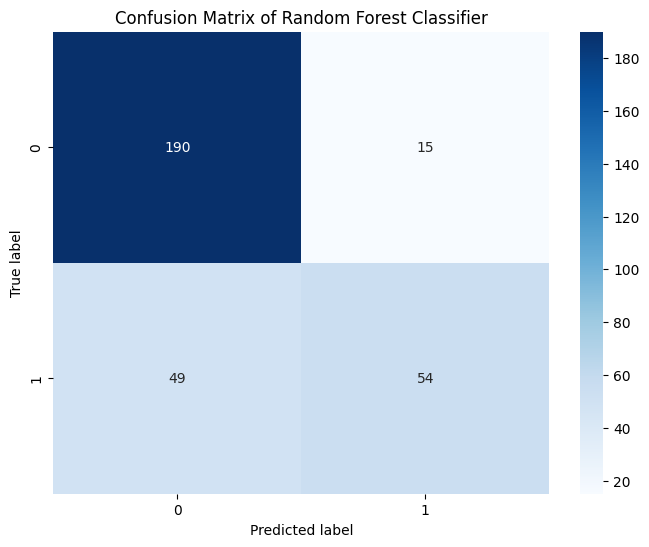

In [31]:
print('Prediction accuracy for Random Forest Classifier;')
print('{:.2%}\n'.format(accuracy_score(y_test, svm_pred)))
print("_______________________________________________")

print("_____________________________________________________")
print('Classification report RFC-classifier')
print("_____________________________________________________")
print(classification_report(y_test,svm_pred))


# Confusion Matrix
cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

In [18]:
# Save Model
import pickle
pickle.dump(svm,open('svm.sav','wb'))

In [19]:
#Read model saved
svm_saved = pickle.load(open('svm.sav', 'rb'))

In [20]:
#install streamlit
!pip install -q streamlit

In [21]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.859s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [22]:
!streamlit run My_app.py &>/content/logs.text &

In [23]:
!npx localtunnel --port 8501

npx: installed 22 in 4.429s
your url is: https://dry-mails-notice.loca.lt
^C
